### Data Loading

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [2]:
sig = True
zscore = True

Load in S14 Data

In [3]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore)

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


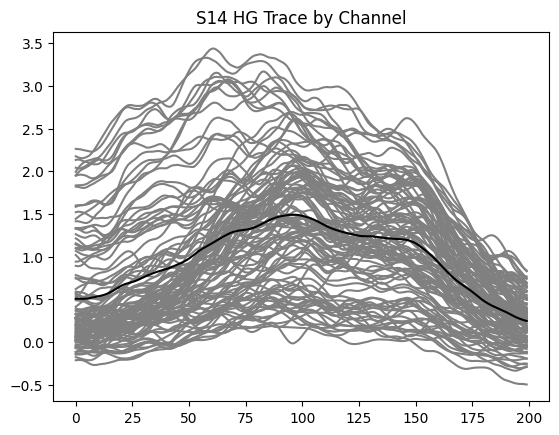

In [64]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S14_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S14_hg_trace, axis=0), axis=1), 'black')
plt.title('S14 HG Trace by Channel')
plt.show()

Load in S26 Data

In [5]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore)

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


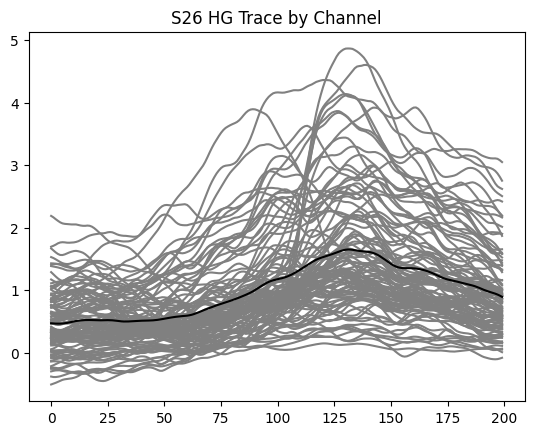

In [65]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('S26 HG Trace by Channel')
plt.show()

Load in S23 Data

In [7]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore)

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


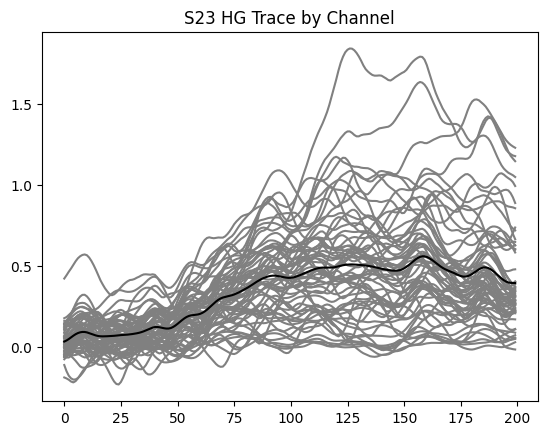

In [66]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('S23 HG Trace by Channel')
plt.show()

Load in S33 Data

In [9]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore)

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


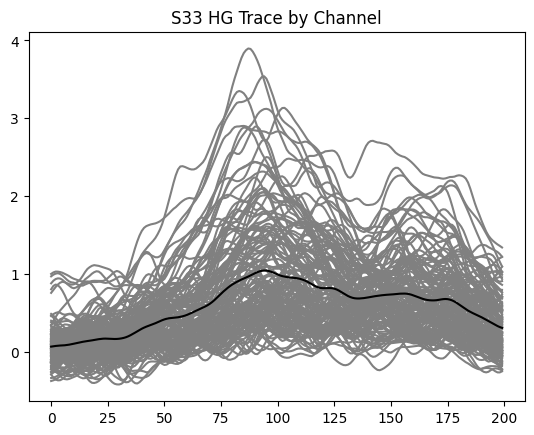

In [67]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('S33 HG Trace by Channel')
plt.show()

## PCA Visualization

In [70]:
from sklearn.decomposition import PCA

### Time-Averaged Across Single Window

In [106]:
t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
t_avg_win = [0, 0.25]
t_avg_win_idx = np.where((t >= t_avg_win[0]) & (t <= t_avg_win[1]))[0]

In [107]:
# X_S14 = np.reshape(S14_hg_trace, (S14_hg_trace.shape[0], S14_hg_trace.shape[1] * S14_hg_trace.shape[2]))
# X_S26 = np.reshape(S26_hg_trace, (S26_hg_trace.shape[0], S26_hg_trace.shape[1] * S26_hg_trace.shape[2]))
# X_S23 = np.reshape(S23_hg_trace, (S23_hg_trace.shape[0], S23_hg_trace.shape[1] * S23_hg_trace.shape[2]))
# X_S33 = np.reshape(S33_hg_trace, (S33_hg_trace.shape[0], S33_hg_trace.shape[1] * S33_hg_trace.shape[2]))
X_S14 = np.mean(S14_hg_trace[:, t_avg_win_idx], axis=1)  # average across time
X_S26 = np.mean(S26_hg_trace[:, t_avg_win_idx], axis=1)
X_S23 = np.mean(S23_hg_trace[:, t_avg_win_idx], axis=1)
X_S33 = np.mean(S33_hg_trace[:, t_avg_win_idx], axis=1)

In [109]:
n_features = 10
pca = PCA(n_components=n_features)
Xt_S14 = pca.fit_transform(X_S14)
Xt_S26 = pca.fit_transform(X_S26)
Xt_S23 = pca.fit_transform(X_S23)
Xt_S33 = pca.fit_transform(X_S33)

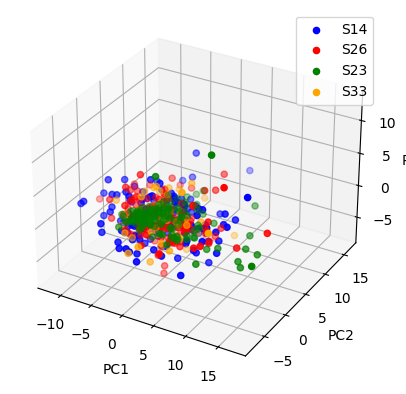

In [110]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Xt_S14[:, 0], Xt_S14[:, 1], Xt_S14[:, 2], color='blue', label='S14')
ax.scatter(Xt_S26[:, 0], Xt_S26[:, 1], Xt_S26[:, 2], color='red', label='S26')
ax.scatter(Xt_S23[:, 0], Xt_S23[:, 1], Xt_S23[:, 2], color='green', label='S23')
ax.scatter(Xt_S33[:, 0], Xt_S33[:, 1], Xt_S33[:, 2], color='orange', label='S33')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

In [111]:
pca_S14 = PCA(n_components=n_features)
pca_S26 = PCA(n_components=n_features)
pca_S23 = PCA(n_components=n_features)
pca_S33 = PCA(n_components=n_features)

pca_S14.fit(X_S14)
pca_S26.fit(X_S26)
pca_S23.fit(X_S23)
pca_S33.fit(X_S33)

PCA(n_components=10)

In [112]:
lat_dyn_S14 = np.vectorize(pca_S14.transform, signature='(n,m)->(n,k)')(S14_hg_trace)
lat_dyn_S26 = np.vectorize(pca_S26.transform, signature='(n,m)->(n,k)')(S26_hg_trace)
lat_dyn_S23 = np.vectorize(pca_S23.transform, signature='(n,m)->(n,k)')(S23_hg_trace)
lat_dyn_S33 = np.vectorize(pca_S33.transform, signature='(n,m)->(n,k)')(S33_hg_trace)

In [113]:
tr_avg_lat_dyn_S14 = np.mean(lat_dyn_S14, axis=0)
tr_avg_lat_dyn_S26 = np.mean(lat_dyn_S26, axis=0)
tr_avg_lat_dyn_S23 = np.mean(lat_dyn_S23, axis=0)
tr_avg_lat_dyn_S33 = np.mean(lat_dyn_S33, axis=0)

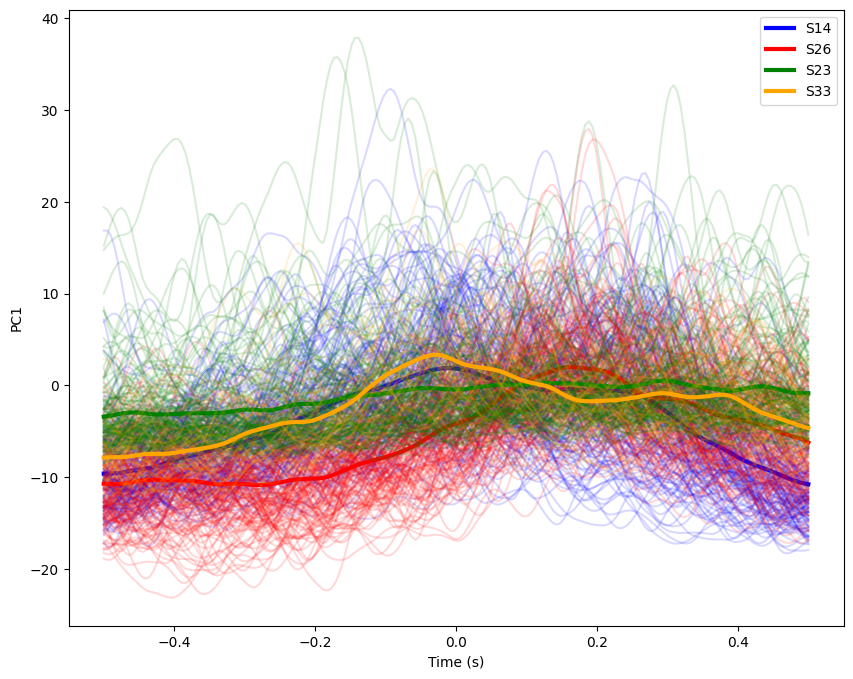

In [114]:

tr_alpha = 0.15

plt.figure(figsize=(10,8))
plt.plot(t, lat_dyn_S14[:,:,0].T, color='blue', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S14[:,0], color='blue', label='S14', linewidth=3)
plt.plot(t, lat_dyn_S26[:,:,0].T, color='red', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S26[:,0], color='red', label='S26', linewidth=3)
plt.plot(t, lat_dyn_S23[:,:,0].T, color='green', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S23[:,0], color='green', label='S23', linewidth=3)
plt.plot(t, lat_dyn_S33[:,:,0].T, color='orange', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S33[:,0], color='orange', label='S33', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('PC1')
plt.legend()
plt.show()


In [127]:
tr_avg_lat_dyn_S14[:,2]

array([ 1.47582370e+00,  1.46274515e+00,  1.44986541e+00,  1.43844820e+00,
        1.43087682e+00,  1.43160890e+00,  1.44213255e+00,  1.45404401e+00,
        1.45856045e+00,  1.45068595e+00,  1.43069865e+00,  1.40489072e+00,
        1.38554675e+00,  1.37918473e+00,  1.38413895e+00,  1.40314370e+00,
        1.43836678e+00,  1.49412994e+00,  1.56276528e+00,  1.63632045e+00,
        1.70715045e+00,  1.76825271e+00,  1.81559590e+00,  1.84660842e+00,
        1.86425726e+00,  1.87028338e+00,  1.86638242e+00,  1.85132257e+00,
        1.83151377e+00,  1.81102828e+00,  1.79116360e+00,  1.76975884e+00,
        1.74555608e+00,  1.72112131e+00,  1.70107520e+00,  1.69146084e+00,
        1.68814892e+00,  1.69069896e+00,  1.70272356e+00,  1.72145059e+00,
        1.74822310e+00,  1.77553118e+00,  1.79172199e+00,  1.79280776e+00,
        1.78067208e+00,  1.75636715e+00,  1.71630531e+00,  1.66813225e+00,
        1.61747153e+00,  1.56471380e+00,  1.51153229e+00,  1.46684446e+00,
        1.43330744e+00,  

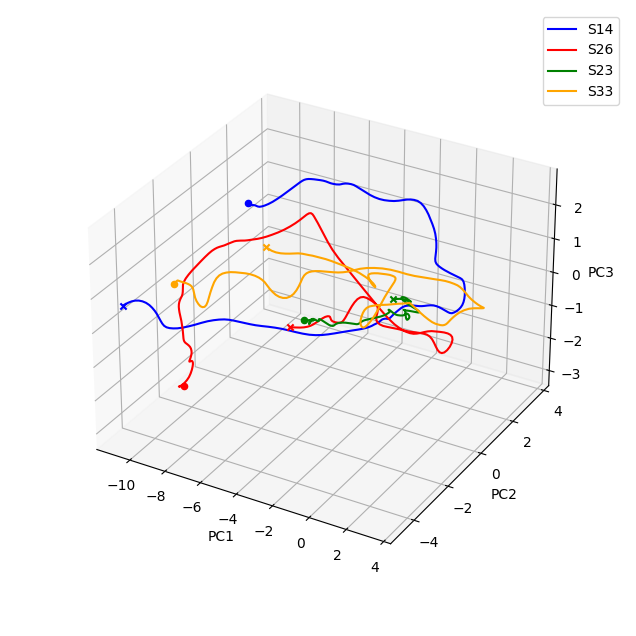

In [134]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.85)
ax.plot(tr_avg_lat_dyn_S14[:, 0], tr_avg_lat_dyn_S14[:, 1], tr_avg_lat_dyn_S14[:, 2], color='blue', label='S14')
ax.scatter(tr_avg_lat_dyn_S14[0, 0], tr_avg_lat_dyn_S14[0, 1], tr_avg_lat_dyn_S14[0, 2], color='blue')
ax.scatter(tr_avg_lat_dyn_S14[-1, 0], tr_avg_lat_dyn_S14[-1, 1], tr_avg_lat_dyn_S14[-1, 2], marker='x', color='blue')
ax.plot(tr_avg_lat_dyn_S26[:, 0], tr_avg_lat_dyn_S26[:, 1], tr_avg_lat_dyn_S26[:, 2], color='red', label='S26')
ax.scatter(tr_avg_lat_dyn_S26[0, 0], tr_avg_lat_dyn_S26[0, 1], tr_avg_lat_dyn_S26[0, 2], color='red')
ax.scatter(tr_avg_lat_dyn_S26[-1, 0], tr_avg_lat_dyn_S26[-1, 1], tr_avg_lat_dyn_S26[-1, 2], marker='x', color='red')
ax.plot(tr_avg_lat_dyn_S23[:, 0], tr_avg_lat_dyn_S23[:, 1], tr_avg_lat_dyn_S23[:, 2], color='green', label='S23')
ax.scatter(tr_avg_lat_dyn_S23[0, 0], tr_avg_lat_dyn_S23[0, 1], tr_avg_lat_dyn_S23[0, 2], color='green')
ax.scatter(tr_avg_lat_dyn_S23[-1, 0], tr_avg_lat_dyn_S23[-1, 1], tr_avg_lat_dyn_S23[-1, 2], marker='x', color='green')
ax.plot(tr_avg_lat_dyn_S33[:, 0], tr_avg_lat_dyn_S33[:, 1], tr_avg_lat_dyn_S33[:, 2], color='orange', label='S33')
ax.scatter(tr_avg_lat_dyn_S33[0, 0], tr_avg_lat_dyn_S33[0, 1], tr_avg_lat_dyn_S33[0, 2], color='orange')
ax.scatter(tr_avg_lat_dyn_S33[-1, 0], tr_avg_lat_dyn_S33[-1, 1], tr_avg_lat_dyn_S33[-1, 2], marker='x', color='orange')
# ax.scatter(Xt_S14[:, 0], Xt_S14[:, 1], Xt_S14[:, 2], color='blue', label='S14')
# ax.scatter(Xt_S26[:, 0], Xt_S26[:, 1], Xt_S26[:, 2], color='red', label='S26')
# ax.scatter(Xt_S23[:, 0], Xt_S23[:, 1], Xt_S23[:, 2], color='green', label='S23')
# ax.scatter(Xt_S33[:, 0], Xt_S33[:, 1], Xt_S33[:, 2], color='orange', label='S33')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

### Time-Averaged in Smaller Windows

In [74]:

def get_sub_windows(arr, win_size):
    n_time = arr.shape[1]
    n_win = int(n_time / win_size)
    for i in range(n_win):
        yield arr[:, i * win_size:(i + 1) * win_size]

In [95]:
win_size = 10

In [139]:
lat_dyn_win_S14 = np.zeros((S14_hg_trace.shape[0], S14_hg_trace.shape[1], n_features))
offset = np.zeros((n_features,))
for i, S14_win in enumerate(get_sub_windows(S14_hg_trace, win_size)):
    curr_avg = np.mean(S14_win, axis=1)
    curr_pca = pca_S14.fit(curr_avg)
    curr_lat_dyn = np.vectorize(curr_pca.transform, signature='(n,m)->(n,k)')(S14_win)
    lat_dyn_win_S14[:, i * win_size:(i + 1) * win_size, :] = curr_lat_dyn + offset
    offset = curr_lat_dyn[-1, :] 

tr_avg_lat_dyn_win_S14 = np.mean(lat_dyn_win_S14, axis=0)

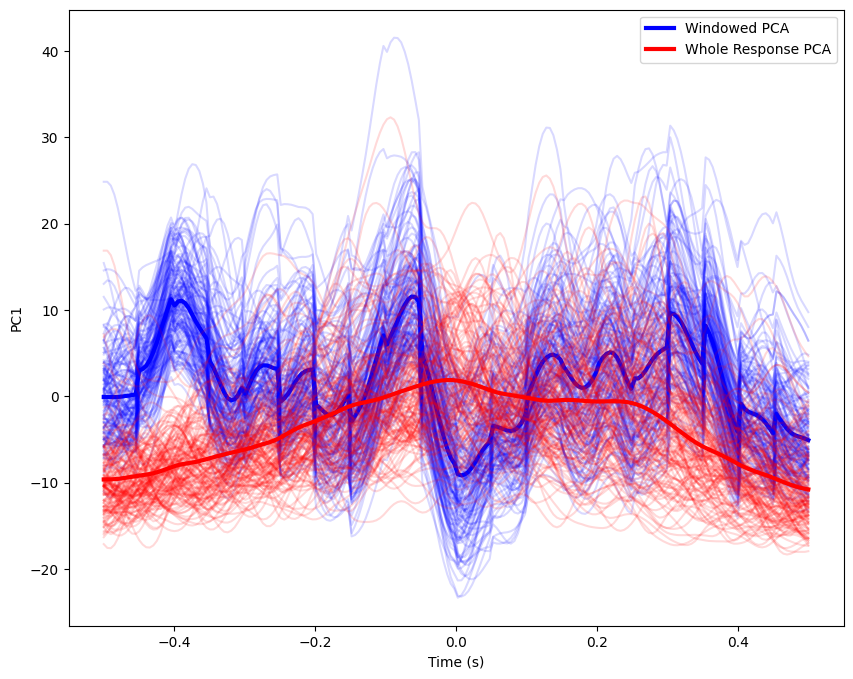

In [140]:
plt.figure(figsize=(10,8))
plt.plot(t, lat_dyn_win_S14[:,:,0].T, color='blue', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_win_S14[:,0], color='blue', label='Windowed PCA', linewidth=3)
plt.plot(t, lat_dyn_S14[:,:,0].T, color='red', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S14[:,0], color='red', label='Whole Response PCA', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('PC1')
plt.legend()
plt.show()